### Problem Definition
Thera Bank recently saw a steep decline in the number of users of their credit cards. Credit cards are a good source of income for banks. Customers leaving credit cards services would lead to losses, therefore the bank would like to analyze customer profile data and identify which customers will leave their credit card services and for what reason. With that insight, Thera Bank can make improvements in those areas. 

### Objective

Build a classification model that will help Thera Bank improve its services so that customers do not renounce their credit cards. Identify the best possible model that will give the required performance.

### Data Dictionary

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

## Import Pertinent Libraries

In [1]:
# import main libraries as needed

# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Inspect Dataset

In [2]:
creditcard_data = pd.read_csv("BankChurners.csv")   # load dataset

In [3]:
df = creditcard_data.copy()   # copy data to avoid changes to original dataset

In [4]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")   # check data shape

Dataset has 10127 rows and 21 columns


In [5]:
df.sample(10)   # check data sample

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4970,714400308,Existing Customer,60,F,0,Uneducated,Single,Less than $40K,Silver,49,3,1,1,11060.000,1647,9413.000,0.938,4545,83,0.766,0.149
9887,773306658,Existing Customer,54,M,1,NaN,Single,$60K - $80K,Blue,48,4,5,4,4752.000,1230,3522.000,0.883,15678,103,0.717,0.259
5210,718984533,Existing Customer,37,M,3,Graduate,Single,$80K - $120K,Blue,29,6,2,4,7199.000,1274,5925.000,0.639,4552,100,0.786,0.177
9856,714757083,Attrited Customer,44,M,4,Uneducated,Married,$60K - $80K,Silver,37,1,2,2,29076.000,0,29076.000,0.770,8765,84,1.211,0.000
6089,818502708,Existing Customer,51,F,1,Uneducated,Single,$40K - $60K,Blue,46,5,3,2,2284.000,1674,610.000,0.784,4885,86,0.830,0.733
3698,719301258,Existing Customer,61,M,0,Post-Graduate,Single,$40K - $60K,Silver,42,4,3,2,15939.000,0,15939.000,0.791,3982,68,0.943,0.000
3525,769578858,Existing Customer,40,M,2,Graduate,Married,$40K - $60K,Silver,33,4,3,1,18737.000,0,18737.000,0.797,4010,76,0.767,0.000
3161,720247158,Existing Customer,63,M,0,Graduate,Single,abc,Blue,36,6,3,2,7108.000,600,6508.000,0.813,3787,68,0.619,0.084
1570,717581658,Existing Customer,49,M,2,NaN,Single,$60K - $80K,Blue,38,4,1,2,2461.000,1586,875.000,1.676,1729,35,0.750,0.644
6843,715019883,Existing Customer,52,M,3,College,Married,$60K - $80K,Blue,42,5,3,1,4565.000,1258,3307.000,0.764,4139,67,0.914,0.276


In [6]:
df.head()   # check first 5 rows

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [7]:
df.tail()   # check last 5 rows

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [8]:
df.info()   # check missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
df.isnull().sum()   # confirm missing values for each feature

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [10]:
df.nunique()   # check number of unique values for each feature

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [11]:
# check unique value counts for each class in feature

cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for columns in cat_cols:
    print("Unique values in column", columns, ":")
    print(df[columns].value_counts())
    print("-" * 40)

Unique values in column Attrition_Flag :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
Unique values in column Gender :
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Unique values in column Education_Level :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Unique values in column Marital_Status :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Unique values in column Income_Category :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Unique values in column Card_Categ

In [12]:
df.describe(include="all").T   # review initial statistical summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,NaN,NaN,NaN,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000


#### Observations
- 6 categorical features and 14 numerical features (not including client number column). 
- Missing values in Education_Level and Marital_Status. 
- Significant number of records under Income_Category marked as "abc"; will have to treat as nulls and impute appropriately.
- No indication of extreme outliers or nonsensical data.
- Target variable Attrition_Flag is imbalanced with 84% Existing and 16% Attrited customers. 

## Exploratory Data Analysis

### Pre-EDA Treatment

In [13]:
df.drop('CLIENTNUM', axis=1, inplace=True)   # drop client number column since no analytical value

In [14]:
# assign all missing and illogical values to string "Unknown"

df['Education_Level'] = df['Education_Level'].fillna('Unknown')
df['Marital_Status'] = df['Marital_Status'].fillna('Unknown')
df.loc[df[df['Income_Category'] == 'abc'].index, 'Income_Category'] = 'Unknown'

In [15]:
# convert all categorical features from "object" to "category" type

df[cat_cols] = df[cat_cols].astype('category')

In [16]:
df.info()   # recheck missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

### Univariate Analysis

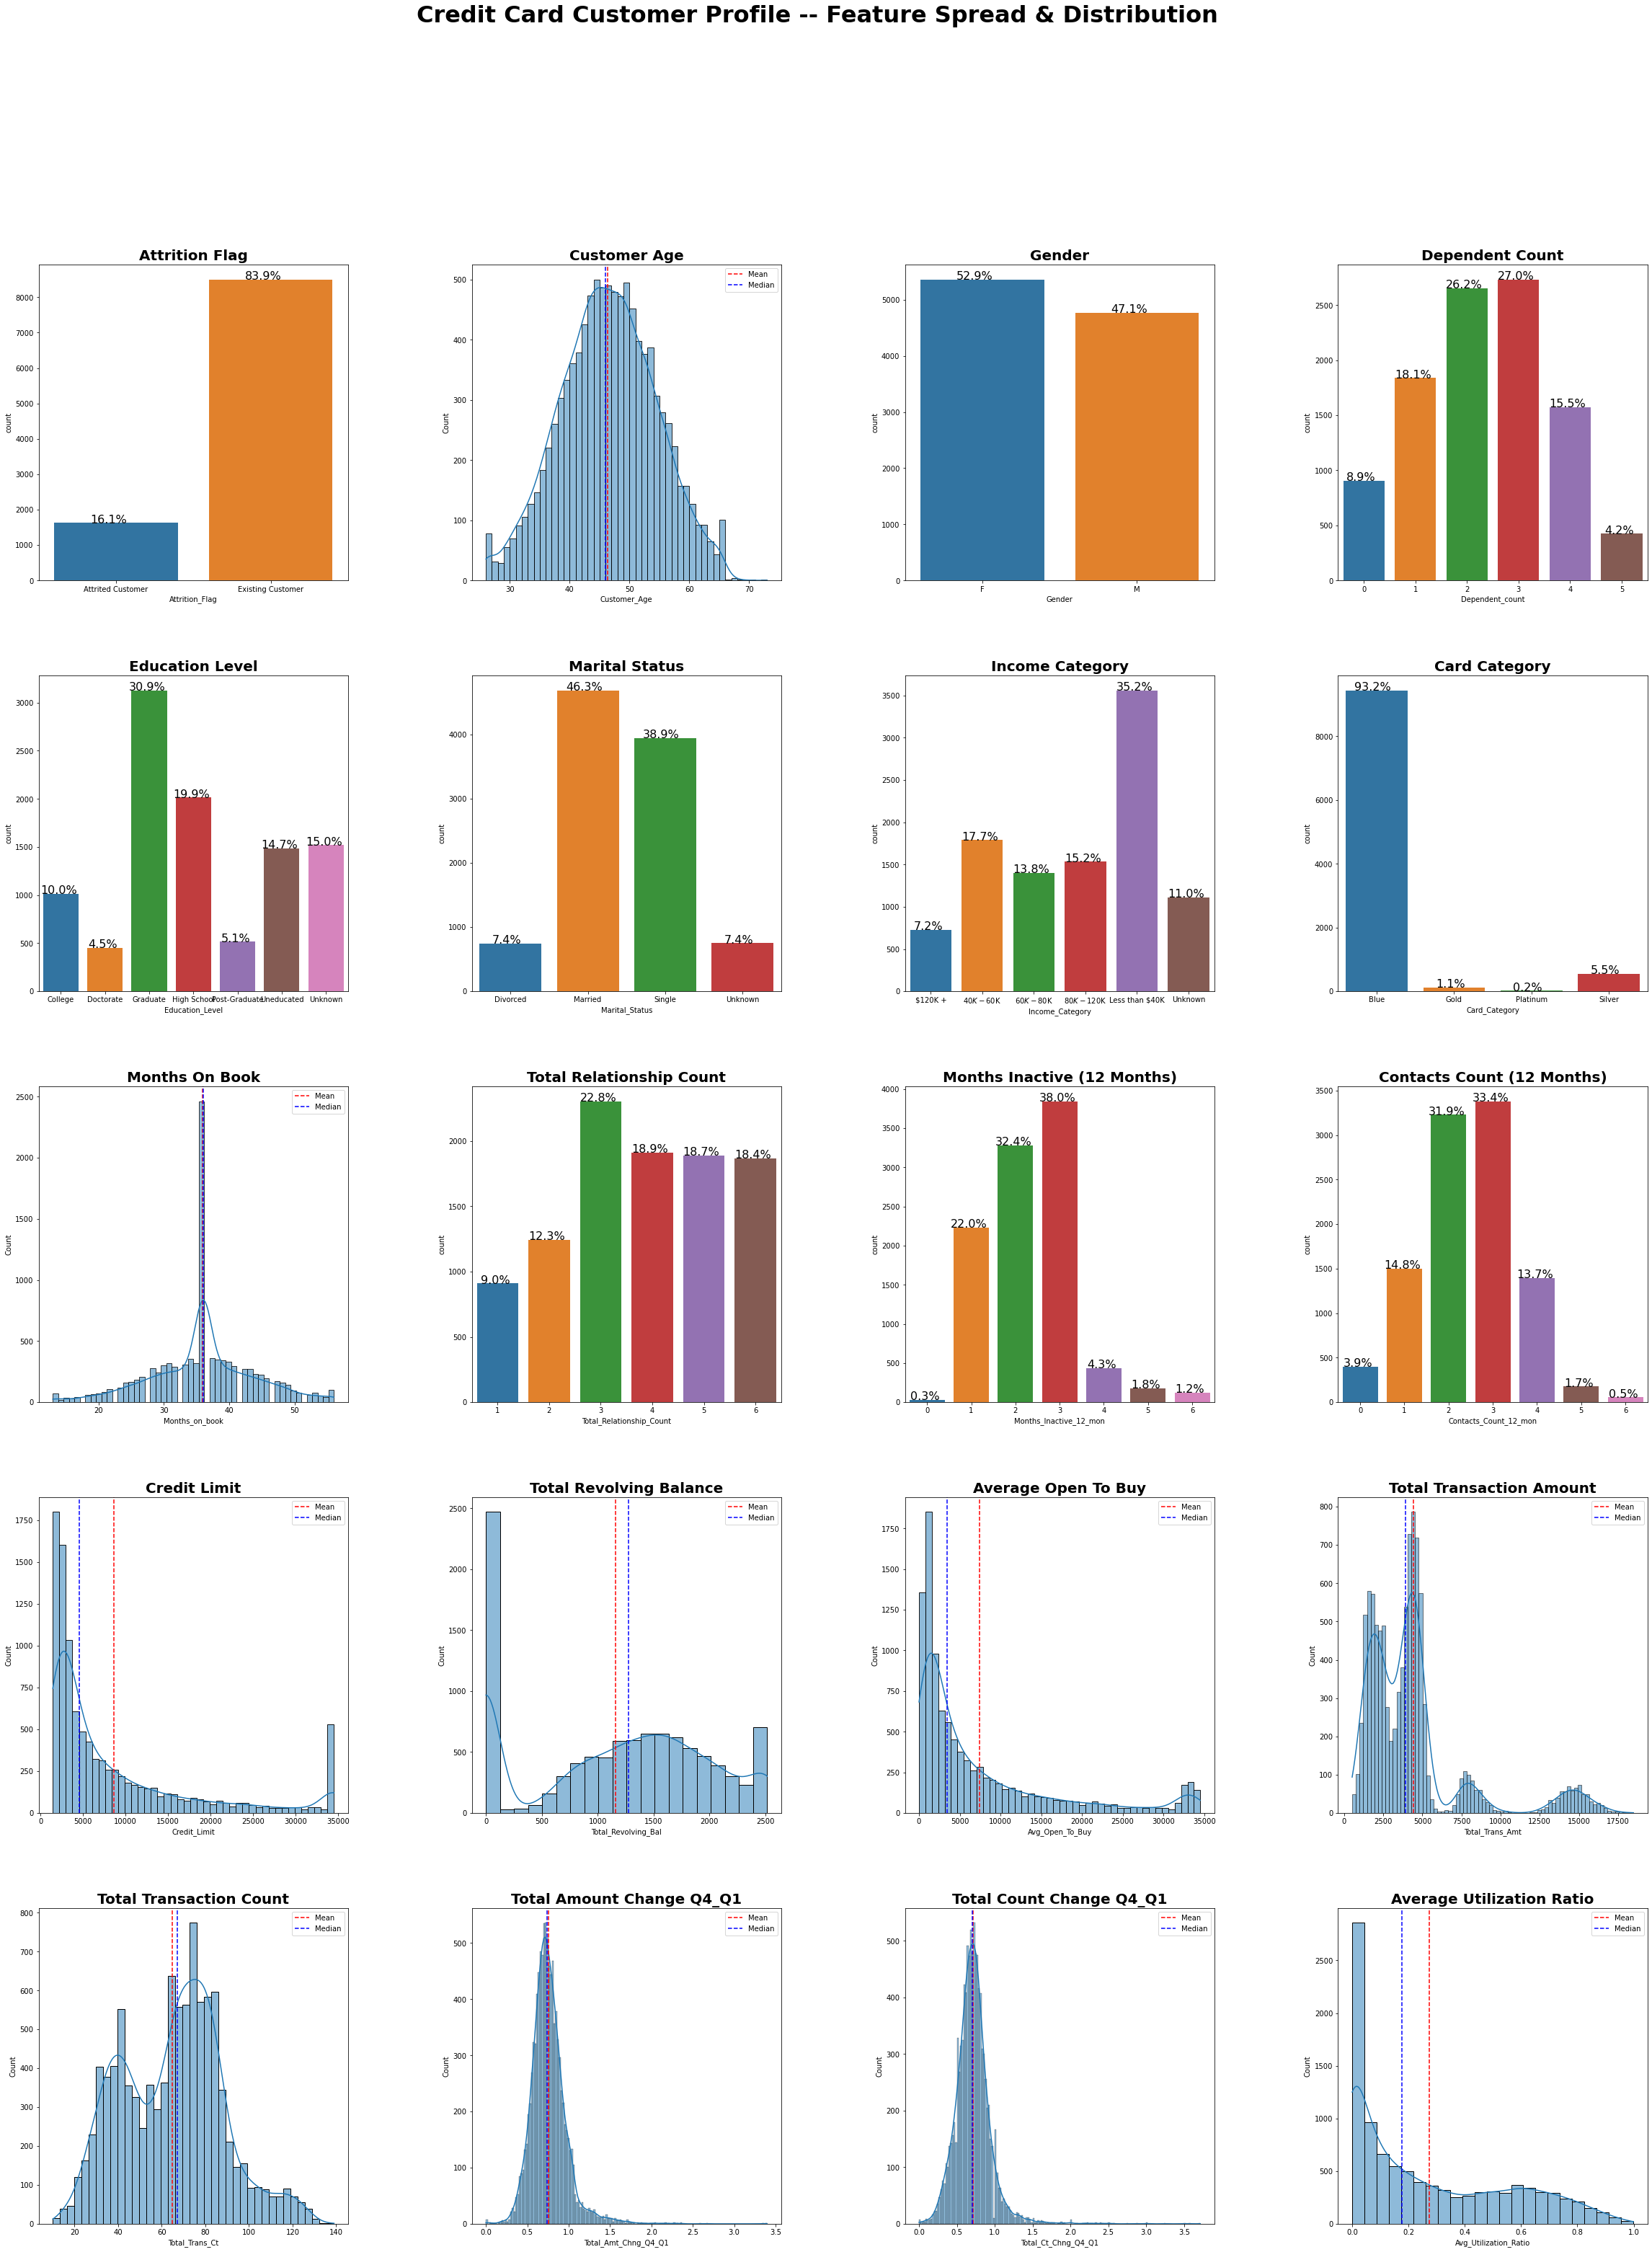

In [17]:
# create distribution plots for all features numerical and categorical
# create 5x4-grid master plot with 20 subplots

uvplot1 = plt.figure(figsize=[40,50])   
uvplot1.subplots_adjust(hspace=0.3, wspace=0.4)
uvplot1.suptitle("Credit Card Customer Profile -- Feature Spread & Distribution", fontweight='bold', fontsize='32')

uvfeat0 = uvplot1.add_subplot(5,4,1)
ax0 = sns.countplot(x='Attrition_Flag', data=df, ax=uvfeat0);
uvfeat0.set_title('Attrition Flag', fontweight='bold', fontsize='20')
for p in ax0.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Attrition_Flag']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat1 = uvplot1.add_subplot(5,4,2)
sns.histplot(df.Customer_Age, kde=True, ax=uvfeat1);
uvfeat1.set_title('Customer Age', fontweight='bold', fontsize='20')
uvfeat1.axvline(df['Customer_Age'].mean(), color='red', linestyle='--', label='Mean')
uvfeat1.axvline(df['Customer_Age'].median(), color='blue', linestyle='--', label='Median')
uvfeat1.legend()

uvfeat2 = uvplot1.add_subplot(5,4,3)
ax2 = sns.countplot(x='Gender', data=df, ax=uvfeat2);
uvfeat2.set_title('Gender', fontweight='bold', fontsize='20')
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Gender']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat3 = uvplot1.add_subplot(5,4,4)
ax3 = sns.countplot(x='Dependent_count', data=df, ax=uvfeat3);
uvfeat3.set_title('Dependent Count', fontweight='bold', fontsize='20')
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Dependent_count']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat4 = uvplot1.add_subplot(5,4,5)
ax4 = sns.countplot(x='Education_Level', data=df, ax=uvfeat4);
uvfeat4.set_title('Education Level', fontweight='bold', fontsize='20')
for p in ax4.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Education_Level']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat5 = uvplot1.add_subplot(5,4,6)
ax5 = sns.countplot(x='Marital_Status', data=df, ax=uvfeat5);
uvfeat5.set_title('Marital Status', fontweight='bold', fontsize='20')
for p in ax5.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Marital_Status']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat6 = uvplot1.add_subplot(5,4,7)
ax6 = sns.countplot(x='Income_Category', data=df, ax=uvfeat6);
uvfeat6.set_title('Income Category', fontweight='bold', fontsize='20')
for p in ax6.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Income_Category']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')
    
uvfeat7 = uvplot1.add_subplot(5,4,8)
ax7 = sns.countplot(x='Card_Category', data=df, ax=uvfeat7);
uvfeat7.set_title('Card Category', fontweight='bold', fontsize='20')
for p in ax7.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Card_Category']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat8 = uvplot1.add_subplot(5,4,9)
sns.histplot(df.Months_on_book, kde=True, ax=uvfeat8);
uvfeat8.set_title('Months On Book', fontweight='bold', fontsize='20')
uvfeat8.axvline(df['Months_on_book'].mean(), color='red', linestyle='--', label='Mean')
uvfeat8.axvline(df['Months_on_book'].median(), color='blue', linestyle='--', label='Median')
uvfeat8.legend()

uvfeat9 = uvplot1.add_subplot(5,4,10)
ax9 = sns.countplot(x='Total_Relationship_Count', data=df, ax=uvfeat9);
uvfeat9.set_title('Total Relationship Count', fontweight='bold', fontsize='20')
for p in ax9.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Total_Relationship_Count']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat10 = uvplot1.add_subplot(5,4,11)
ax10 = sns.countplot(x='Months_Inactive_12_mon', data=df, ax=uvfeat10);
uvfeat10.set_title('Months Inactive (12 Months)', fontweight='bold', fontsize='20')
for p in ax10.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Months_Inactive_12_mon']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat11 = uvplot1.add_subplot(5,4,12)
ax11 = sns.countplot(x='Contacts_Count_12_mon', data=df, ax=uvfeat11);
uvfeat11.set_title('Contacts Count (12 Months)', fontweight='bold', fontsize='20')
for p in ax11.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Contacts_Count_12_mon']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat12 = uvplot1.add_subplot(5,4,13)
sns.histplot(df.Credit_Limit, kde=True, ax=uvfeat12);
uvfeat12.set_title('Credit Limit', fontweight='bold', fontsize='20')
uvfeat12.axvline(df['Credit_Limit'].mean(), color='red', linestyle='--', label='Mean')
uvfeat12.axvline(df['Credit_Limit'].median(), color='blue', linestyle='--', label='Median')
uvfeat12.legend()
    
uvfeat13 = uvplot1.add_subplot(5,4,14)
sns.histplot(df.Total_Revolving_Bal, kde=True, ax=uvfeat13);
uvfeat13.set_title('Total Revolving Balance', fontweight='bold', fontsize='20')
uvfeat13.axvline(df['Total_Revolving_Bal'].mean(), color='red', linestyle='--', label='Mean')
uvfeat13.axvline(df['Total_Revolving_Bal'].median(), color='blue', linestyle='--', label='Median')
uvfeat13.legend()

uvfeat14 = uvplot1.add_subplot(5,4,15)
sns.histplot(df.Avg_Open_To_Buy, kde=True, ax=uvfeat14);
uvfeat14.set_title('Average Open To Buy', fontweight='bold', fontsize='20')
uvfeat14.axvline(df['Avg_Open_To_Buy'].mean(), color='red', linestyle='--', label='Mean')
uvfeat14.axvline(df['Avg_Open_To_Buy'].median(), color='blue', linestyle='--', label='Median')
uvfeat14.legend()
    
uvfeat15 = uvplot1.add_subplot(5,4,16)
sns.histplot(df.Total_Trans_Amt, kde=True, ax=uvfeat15);
uvfeat15.set_title('Total Transaction Amount', fontweight='bold', fontsize='20')
uvfeat15.axvline(df['Total_Trans_Amt'].mean(), color='red', linestyle='--', label='Mean')
uvfeat15.axvline(df['Total_Trans_Amt'].median(), color='blue', linestyle='--', label='Median')
uvfeat15.legend()

uvfeat16 = uvplot1.add_subplot(5,4,17)
sns.histplot(df.Total_Trans_Ct, kde=True, ax=uvfeat16);
uvfeat16.set_title('Total Transaction Count', fontweight='bold', fontsize='20')
uvfeat16.axvline(df['Total_Trans_Ct'].mean(), color='red', linestyle='--', label='Mean')
uvfeat16.axvline(df['Total_Trans_Ct'].median(), color='blue', linestyle='--', label='Median')
uvfeat16.legend()

uvfeat17 = uvplot1.add_subplot(5,4,18)
sns.histplot(df.Total_Amt_Chng_Q4_Q1, kde=True, ax=uvfeat17);
uvfeat17.set_title('Total Amount Change Q4_Q1', fontweight='bold', fontsize='20')
uvfeat17.axvline(df['Total_Amt_Chng_Q4_Q1'].mean(), color='red', linestyle='--', label='Mean')
uvfeat17.axvline(df['Total_Amt_Chng_Q4_Q1'].median(), color='blue', linestyle='--', label='Median')
uvfeat17.legend()

uvfeat18 = uvplot1.add_subplot(5,4,19)
sns.histplot(df.Total_Ct_Chng_Q4_Q1, kde=True, ax=uvfeat18);
uvfeat18.set_title('Total Count Change Q4_Q1', fontweight='bold', fontsize='20')
uvfeat18.axvline(df['Total_Ct_Chng_Q4_Q1'].mean(), color='red', linestyle='--', label='Mean')
uvfeat18.axvline(df['Total_Ct_Chng_Q4_Q1'].median(), color='blue', linestyle='--', label='Median')
uvfeat18.legend()

uvfeat19 = uvplot1.add_subplot(5,4,20)
sns.histplot(df.Avg_Utilization_Ratio, kde=True, ax=uvfeat19);
uvfeat19.set_title('Average Utilization Ratio', fontweight='bold', fontsize='20')
uvfeat19.axvline(df['Avg_Utilization_Ratio'].mean(), color='red', linestyle='--', label='Mean')
uvfeat19.axvline(df['Avg_Utilization_Ratio'].median(), color='blue', linestyle='--', label='Median')
uvfeat19.legend()

plt.show()

#### Observations
- Target variable Attrition_Flag is imbalanced with 84% Existing and 16% Attrited customers.
- Mean customer age is around 46 years old (min at 26 and max at 73).
- Customer gender is quite balanced with number of female customers slightly higher.
- Majority of customers have 2-3 dependents.
- Majority of customers made up of college and high school graduates.
- Majority of customers make less than 60K salary.
- Dataset consists mainly of customers (~93%) carrying Blue card. 
- Signicant concentration of customers having 36-month relationship with bank. 
- Majority of customers were inactive from 1-3 months in the last 12 months. 
- Majority of customers had 2-3 points of contact with bank in the last 12 months.
- Credit Limit distribution is heavily skewed to the right which is understandable. 
- Total Revolving Balance showing numerous concentrated outliers on both ends, but this is understandable.
- Total Transaction Count and Total Transaction Amount showing 2 peaks with last 12 months. 
- Average Open to Buy and Average Utilization Ratio is heavily skewed to the right.

### Bivariate Analysis

In [18]:
df.corr().round(3)   # check pairwise correlation

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000,-0.122,0.789,-0.011,0.054,-0.018,0.002,0.015,0.001,-0.062,-0.046,-0.067,-0.012,0.007
Dependent_count,-0.122,1.000,-0.103,-0.039,-0.011,-0.041,0.068,-0.003,0.068,-0.035,0.025,0.050,0.011,-0.037
Months_on_book,0.789,-0.103,1.000,-0.009,0.074,-0.011,0.008,0.009,0.007,-0.049,-0.039,-0.050,-0.014,-0.008
Total_Relationship_Count,-0.011,-0.039,-0.009,1.000,-0.004,0.055,-0.071,0.014,-0.073,0.050,-0.347,-0.242,0.041,0.068
Months_Inactive_12_mon,0.054,-0.011,0.074,-0.004,1.000,0.029,-0.020,-0.042,-0.017,-0.032,-0.037,-0.043,-0.039,-0.008
Contacts_Count_12_mon,-0.018,-0.041,-0.011,0.055,0.029,1.000,0.021,-0.054,0.026,-0.024,-0.113,-0.152,-0.095,-0.055
Credit_Limit,0.002,0.068,0.008,-0.071,-0.020,0.021,1.000,0.042,0.996,0.013,0.172,0.076,-0.002,-0.483
Total_Revolving_Bal,0.015,-0.003,0.009,0.014,-0.042,-0.054,0.042,1.000,-0.047,0.058,0.064,0.056,0.090,0.624
Avg_Open_To_Buy,0.001,0.068,0.007,-0.073,-0.017,0.026,0.996,-0.047,1.000,0.008,0.166,0.071,-0.010,-0.539
Total_Amt_Chng_Q4_Q1,-0.062,-0.035,-0.049,0.050,-0.032,-0.024,0.013,0.058,0.008,1.000,0.040,0.005,0.384,0.035


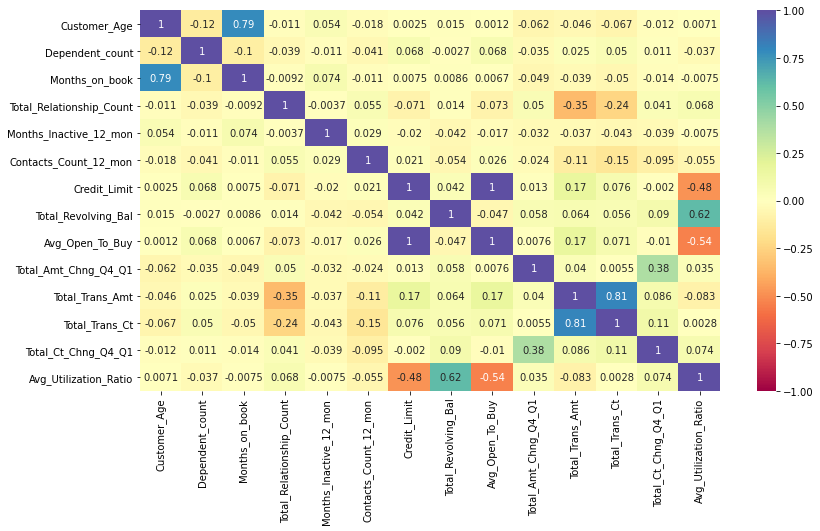

In [19]:
# generate heatmap based on correlation

plt.figure(figsize=[13,7])
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1, cmap='Spectral')
plt.show()

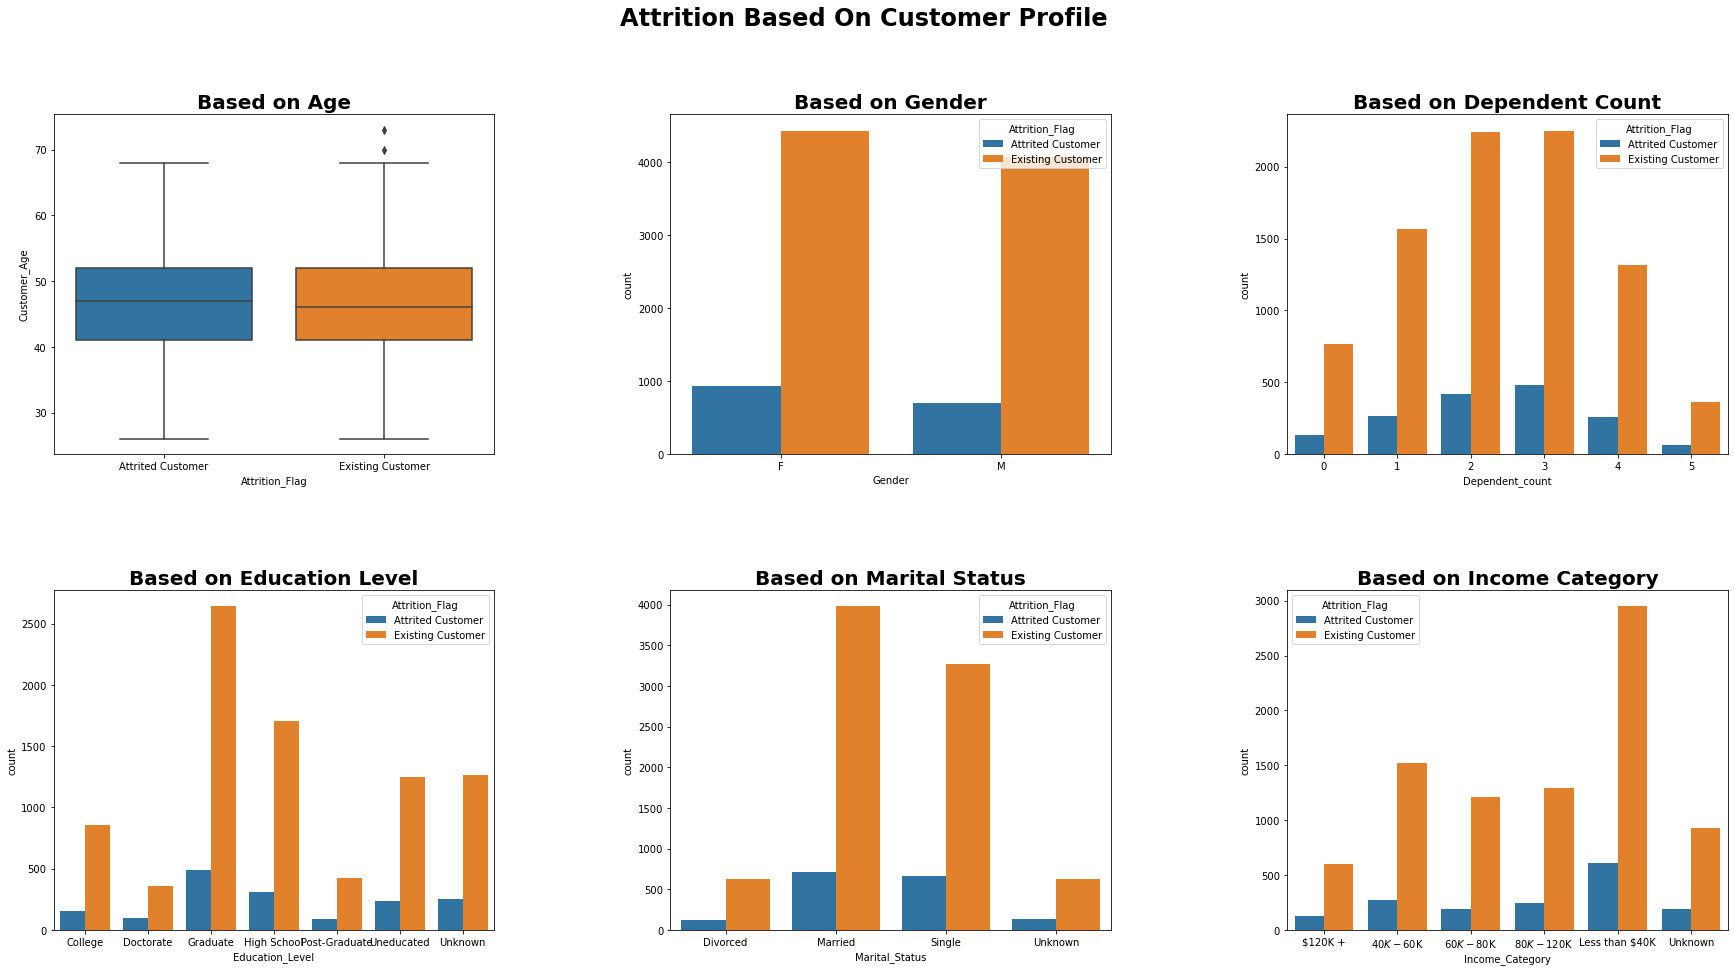

In [20]:
# create bivariate plots plotting impact of Customer profile features on target Attrition Flag
# create 2x3-grid master plot with 6 subplots

mvplot1 = plt.figure(figsize=[30,15])
mvplot1.subplots_adjust(hspace=0.4, wspace=0.4)
mvplot1.suptitle("Attrition Based On Customer Profile", fontweight='bold', fontsize='24')

mvfeat0 = mvplot1.add_subplot(2,3,1)
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df, ax=mvfeat0);
mvfeat0.set_title('Based on Age', fontweight='bold', fontsize='20')

mvfeat1 = mvplot1.add_subplot(2,3,2)
sns.countplot(x='Gender', hue='Attrition_Flag', data=df, ax=mvfeat1);
mvfeat1.set_title('Based on Gender', fontweight='bold', fontsize='20')

mvfeat2 = mvplot1.add_subplot(2,3,3)
sns.countplot(x='Dependent_count', hue='Attrition_Flag', data=df, ax=mvfeat2);
mvfeat2.set_title('Based on Dependent Count', fontweight='bold', fontsize='20')

mvfeat3 = mvplot1.add_subplot(2,3,4)
sns.countplot(x='Education_Level', hue='Attrition_Flag', data=df, ax=mvfeat3);
mvfeat3.set_title('Based on Education Level', fontweight='bold', fontsize='20')

mvfeat4 = mvplot1.add_subplot(2,3,5)
sns.countplot(x='Marital_Status', hue='Attrition_Flag', data=df, ax=mvfeat4);
mvfeat4.set_title('Based on Marital Status', fontweight='bold', fontsize='20')

mvfeat5 = mvplot1.add_subplot(2,3,6)
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df, ax=mvfeat5);
mvfeat5.set_title('Based on Income Category', fontweight='bold', fontsize='20')

plt.show()

#### Observations
- No significant differences with Age and Gender. 
- No trends or correlations with Marital Status or Dependent Count. 
- No trends correlations with Education Level.

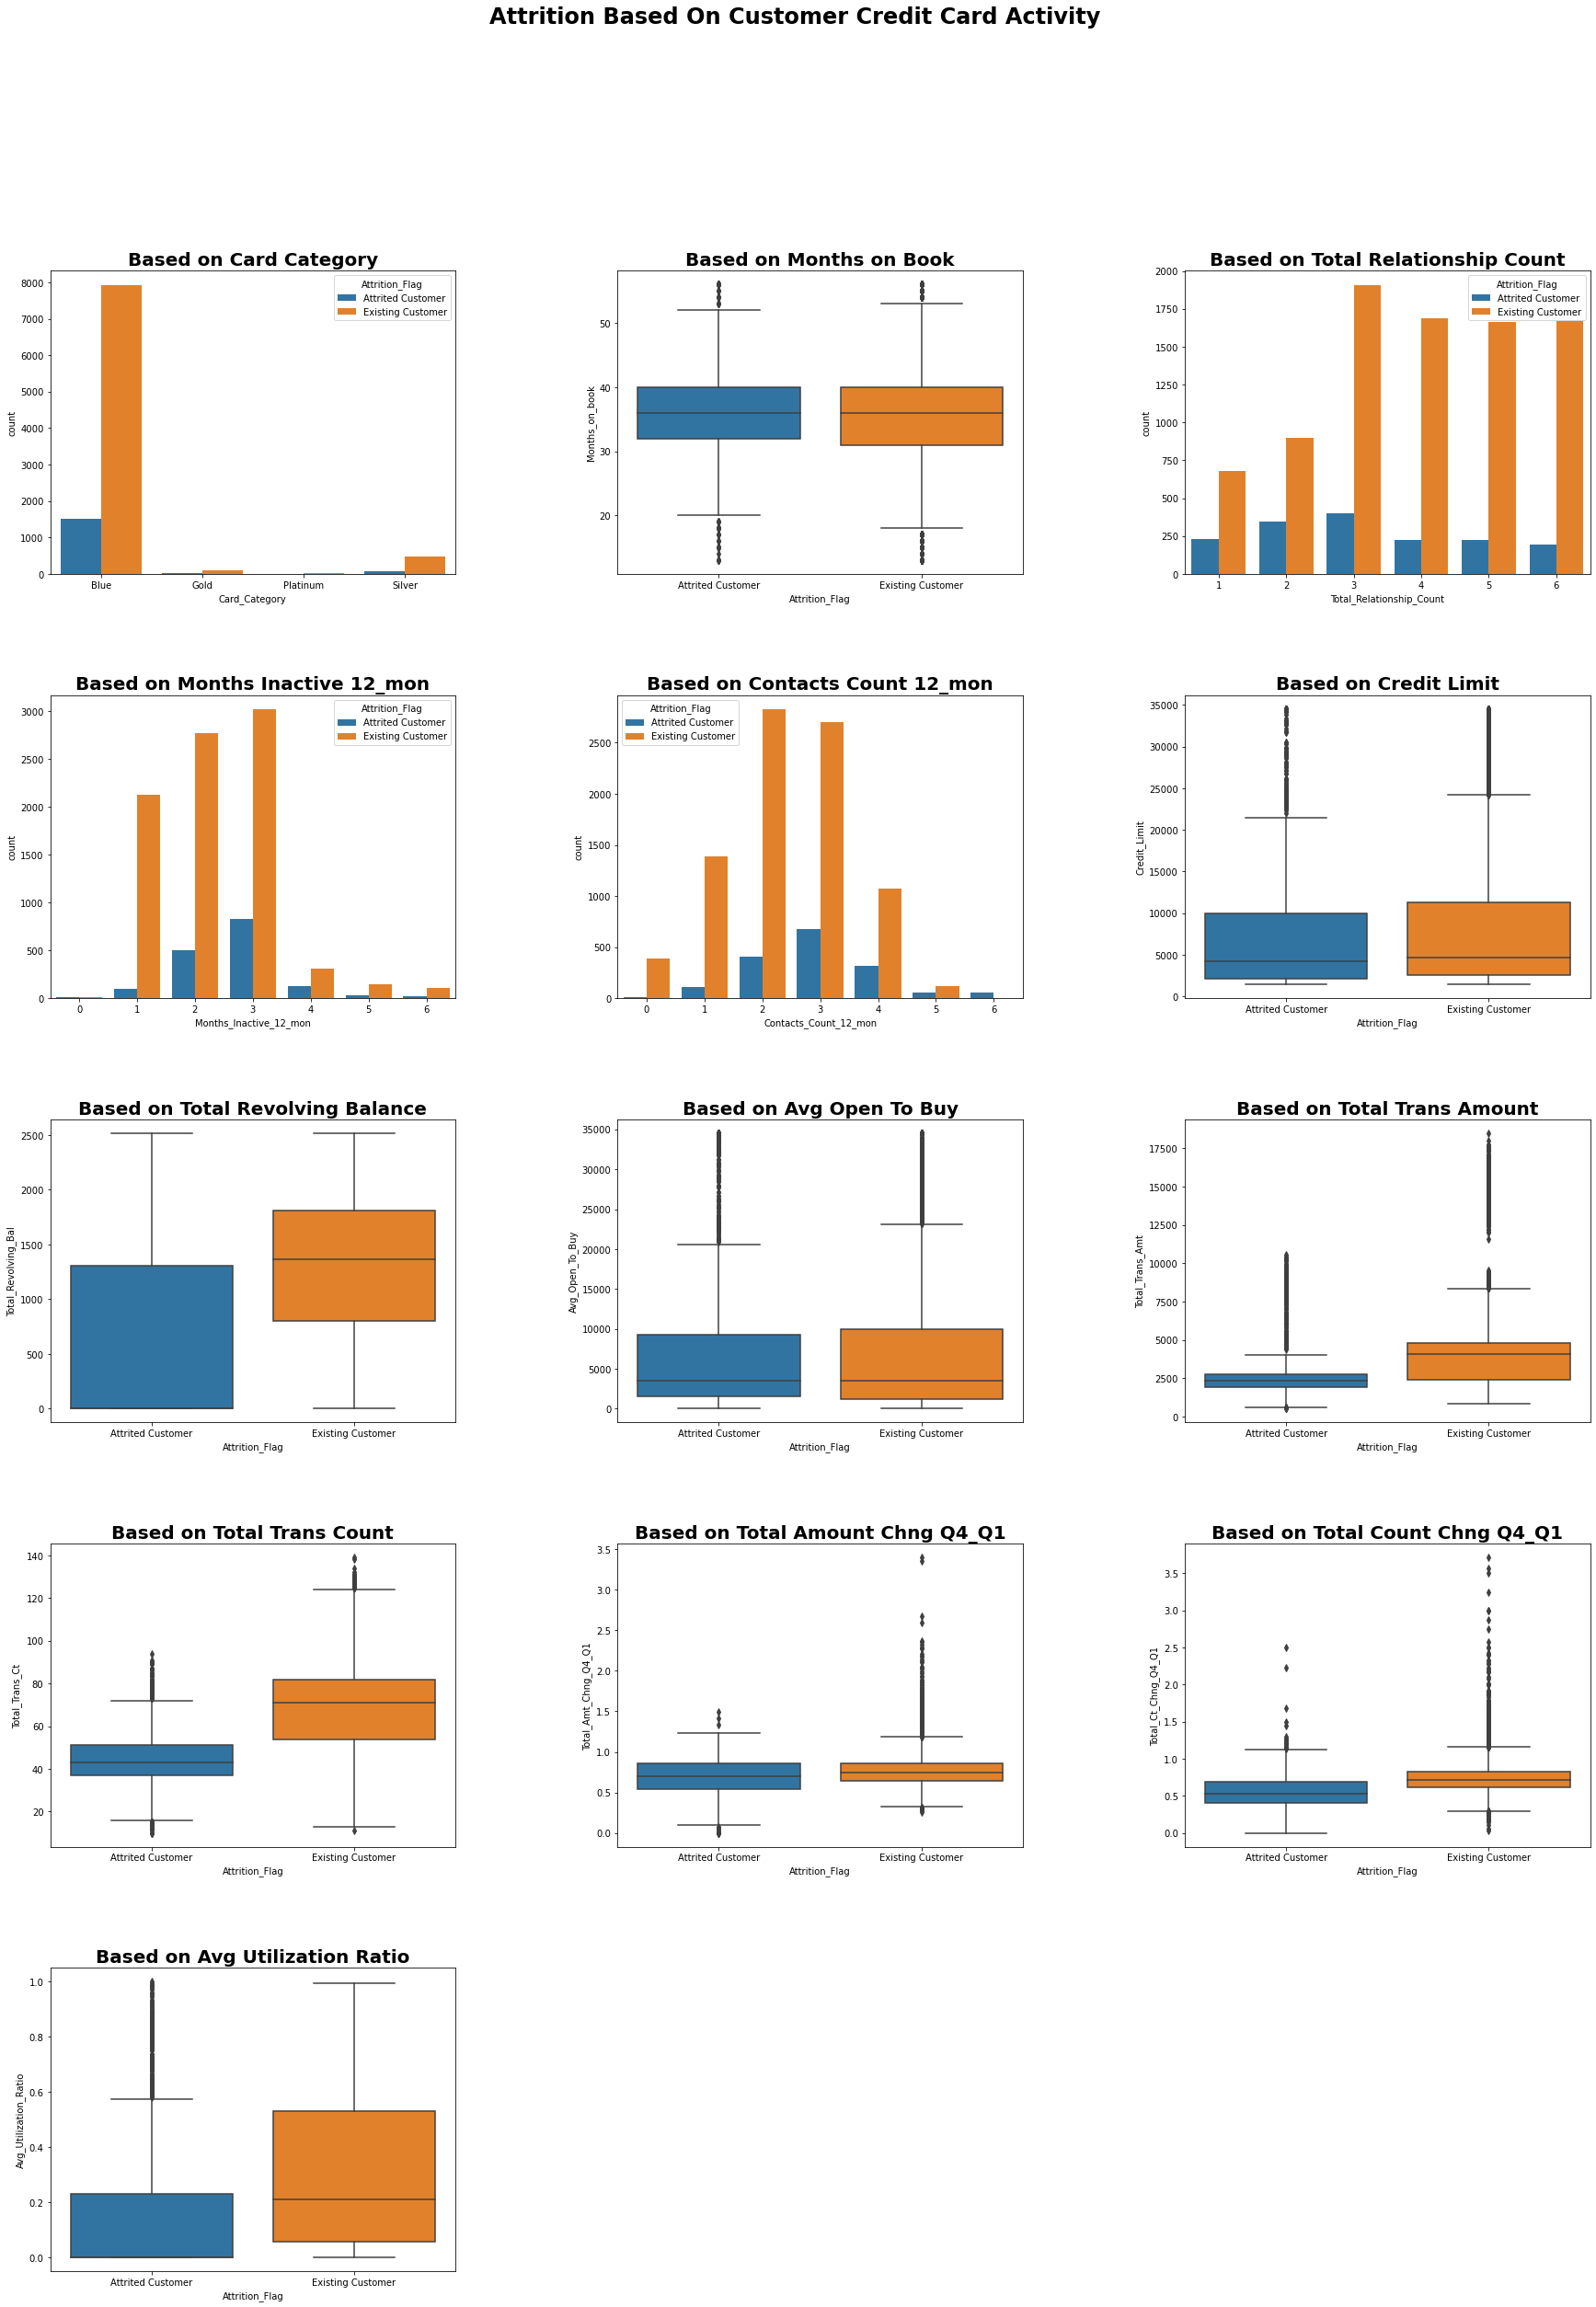

In [21]:
# create bivariate plots plotting impact of Customer credit card activity features on target Attrition Flag
# create 5x3-grid master plot with 13 subplots

mvplot2 = plt.figure(figsize=[30,40])
mvplot2.subplots_adjust(hspace=0.4, wspace=0.4)
mvplot2.suptitle("Attrition Based On Customer Credit Card Activity", fontweight='bold', fontsize='24')

mvfeat6 = mvplot2.add_subplot(5,3,1)
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=df, ax=mvfeat6);
mvfeat6.set_title('Based on Card Category', fontweight='bold', fontsize='20')

mvfeat7 = mvplot2.add_subplot(5,3,2)
sns.boxplot(x='Attrition_Flag', y='Months_on_book', data=df, ax=mvfeat7);
mvfeat7.set_title('Based on Months on Book', fontweight='bold', fontsize='20')

mvfeat8 = mvplot2.add_subplot(5,3,3)
sns.countplot(x='Total_Relationship_Count', hue='Attrition_Flag', data=df, ax=mvfeat8);
mvfeat8.set_title('Based on Total Relationship Count', fontweight='bold', fontsize='20')

mvfeat9 = mvplot2.add_subplot(5,3,4)
sns.countplot(x='Months_Inactive_12_mon', hue='Attrition_Flag', data=df, ax=mvfeat9);
mvfeat9.set_title('Based on Months Inactive 12_mon', fontweight='bold', fontsize='20')

mvfeat10 = mvplot2.add_subplot(5,3,5)
sns.countplot(x='Contacts_Count_12_mon', hue='Attrition_Flag', data=df, ax=mvfeat10);
mvfeat10.set_title('Based on Contacts Count 12_mon', fontweight='bold', fontsize='20')

mvfeat11 = mvplot2.add_subplot(5,3,6)
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df, ax=mvfeat11);
mvfeat11.set_title('Based on Credit Limit', fontweight='bold', fontsize='20')

mvfeat12 = mvplot2.add_subplot(5,3,7)
sns.boxplot(x='Attrition_Flag', y='Total_Revolving_Bal', data=df, ax=mvfeat12);
mvfeat12.set_title('Based on Total Revolving Balance', fontweight='bold', fontsize='20')

mvfeat13 = mvplot2.add_subplot(5,3,8)
sns.boxplot(x='Attrition_Flag', y='Avg_Open_To_Buy', data=df, ax=mvfeat13);
mvfeat13.set_title('Based on Avg Open To Buy', fontweight='bold', fontsize='20')

mvfeat14 = mvplot2.add_subplot(5,3,9)
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df, ax=mvfeat14);
mvfeat14.set_title('Based on Total Trans Amount', fontweight='bold', fontsize='20')

mvfeat15 = mvplot2.add_subplot(5,3,10)
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df, ax=mvfeat15);
mvfeat15.set_title('Based on Total Trans Count', fontweight='bold', fontsize='20')

mvfeat16 = mvplot2.add_subplot(5,3,11)
sns.boxplot(x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', data=df, ax=mvfeat16);
mvfeat16.set_title('Based on Total Amount Chng Q4_Q1', fontweight='bold', fontsize='20')

mvfeat17 = mvplot2.add_subplot(5,3,12)
sns.boxplot(x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', data=df, ax=mvfeat17);
mvfeat17.set_title('Based on Total Count Chng Q4_Q1', fontweight='bold', fontsize='20')

mvfeat18 = mvplot2.add_subplot(5,3,13)
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=df, ax=mvfeat18);
mvfeat18.set_title('Based on Avg Utilization Ratio', fontweight='bold', fontsize='20')

plt.show()

#### Observations
- High occurrence of attrition in Blue card category though it makes up most of the dataset.
- No significant difference with Months on book with bank. 
- Customers with Total Relationship Count of 3 products or less show higher attrition. 
- Customers with smaller Total Revolving Balances showing higher attrition.
- Customers with smaller Total Transaction Counts and Total Transaction Amounts showing higher attrition.
- Customers who attrited show lower Average Utilization Ratio. 

## Data Preprocessing

In [22]:
# encode binary 0/1 values to Target variable

df.Attrition_Flag.replace(('Attrited Customer', 'Existing Customer'), (1, 0), inplace=True)

In [23]:
# separating the independent and dependent variables

X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

In [24]:
# Splitting data into training, validation and testing set:
# first we split data into 2 parts: temp and test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# then we split the temp set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [25]:
# verify class percentages for each set

print("Training Set: \n", y_train.value_counts(normalize=True))
print("\nValidation Set: \n", y_val.value_counts(normalize=True))
print("\nTest Set: \n", y_test.value_counts(normalize=True))

Training Set: 
 0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64

Validation Set: 
 0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64

Test Set: 
 0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64


In [26]:
# impute missing values appropriately for each set

impute_cols = ['Education_Level', 'Marital_Status', 'Income_Category'] 
imputer = SimpleImputer(missing_values='Unknown', strategy="most_frequent")

# Fit and transform the train data 
X_train[impute_cols] = imputer.fit_transform(X_train[impute_cols]) 

# Transform the validation data 
X_val[impute_cols] = imputer.transform(X_val[impute_cols]) 

# Transform the test data 
X_test[impute_cols] = imputer.transform(X_test[impute_cols])

In [27]:
# Creating dummy variables for each set

X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [28]:
# scale numerical features appropriately for each set

robust_scaler = RobustScaler(with_centering=False, with_scaling=True)

num_cols = [
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio',
]

X_train[num_cols] = pd.DataFrame(
    robust_scaler.fit_transform(X_train[num_cols]), columns=num_cols, index=X_train.index
)

X_val[num_cols] = pd.DataFrame(
    robust_scaler.transform(X_val[num_cols]), columns=num_cols, index=X_val.index
)

X_test[num_cols] = pd.DataFrame(
    robust_scaler.transform(X_test[num_cols]), columns=num_cols, index=X_test.index
)

## Model Evaluation Criterion

#### The model can make wrong predictions as:
- Case 1 - Predicting that a customer will renounce credit card services when they actually don't (Loss of Resource).
- Case 2 - Predicting that a customer will not renounce credit card services when they actually do (Loss of Opportunity).

#### Which case is more important?
Case 2 is more important since the objective is to effectively prevent as many existing customers from renouncing credit card services.

#### Which metric to optimize?
The objective is to minimize Loss of Opportunity (i.e. False Negatives). Hence the correct metric to gauge model performance should be Recall. Since data is imbalanced it may not be advisable to use Accuracy. Therefore we need to maximize Recall and also we can keep an eye on improving Precision and F1 score as well.

## Model Building

### Original Data

In [29]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XG Boost", XGBClassifier(random_state=1, eval_metric='logloss')))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression: 54.198848770277344
Decision Tree: 78.17477760334903
Bagging: 78.58451072736787
Random Forest: 75.20251177394034
AdaBoost: 82.16745159602303
Gradient Boost: 81.24646781789639
XG Boost: 86.78126635269493

Validation Performance:

Logistic Regression: 0.5797546012269938
Decision Tree: 0.8159509202453987
Bagging: 0.8128834355828221
Random Forest: 0.7975460122699386
AdaBoost: 0.852760736196319
Gradient Boost: 0.8558282208588958
XG Boost: 0.8834355828220859


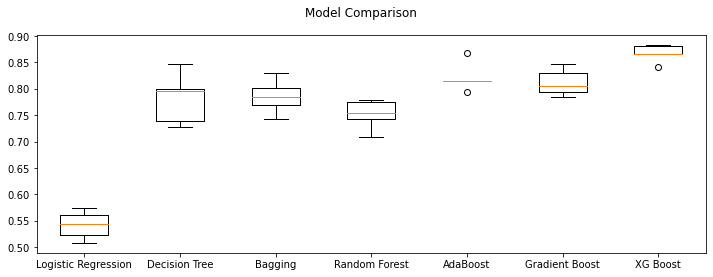

In [30]:
# plot boxplots for CV scores of all models defined above

fig = plt.figure(figsize=[12,4])

fig.suptitle("Model Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

#### Observations
- Using original data -- AdaBoost, Gradient Boost and XG Boost show best cross-validation performance based on Recall score.
- Logistic Regression shows poorest performance out of all models. 

### Oversampled Data

In [31]:
# apply oversampling method and check value counts before and after oversampling

print("Before Oversampling, counts of label 'yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'no': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'no': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of X_train: {}".format(X_train_over.shape))
print("After Oversampling, the shape of y_train: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'yes': 976
Before Oversampling, counts of label 'no': 5099 

After Oversampling, counts of label 'yes': 5099
After Oversampling, counts of label 'no': 5099 

After Oversampling, the shape of X_train: (10198, 29)
After Oversampling, the shape of y_train: (10198,) 



In [32]:
models_over = []  # Empty list to store all the models_over

# Appending models_over into the list
models_over.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_over.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random Forest", RandomForestClassifier(random_state=1)))
models_over.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_over.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models_over.append(("XG Boost", XGBClassifier(random_state=1, eval_metric='logloss')))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models_over
score = []

# loop through all models_over to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_over = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result_over)
    names.append(name)
    print("{}: {}".format(name, cv_result_over.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression: 88.27245088418096
Decision Tree: 93.54769189324405
Bagging: 95.21474340472204
Random Forest: 97.31322519194136
AdaBoost: 95.4893879043276
Gradient Boost: 96.39150262656584
XG Boost: 97.97989185860801

Validation Performance:

Logistic Regression: 0.6687116564417178
Decision Tree: 0.8312883435582822
Bagging: 0.8650306748466258
Random Forest: 0.8680981595092024
AdaBoost: 0.8926380368098159
Gradient Boost: 0.9079754601226994
XG Boost: 0.9141104294478528


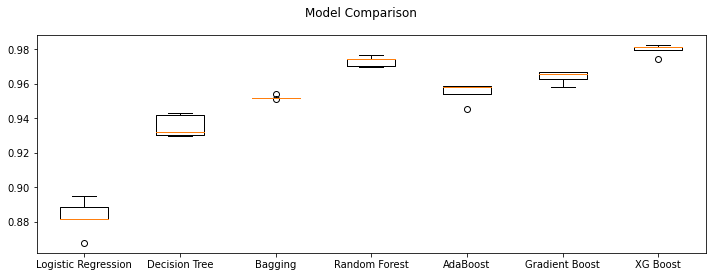

In [33]:
# plot boxplots for CV scores of all models defined above

fig = plt.figure(figsize=[12,4])

fig.suptitle("Model Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

#### Observations
- After oversampling -- Random Forest, Gradient Boost and XG Boost show best cross-validation performance based on Recall score.
- Logistic Regression shows poorest performance out of all models. 

### Undersampled Data

In [34]:
# apply undersampling method

rus = RandomUnderSampler(random_state=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [35]:
# check value counts before and after undersampling

print("Before Undersampling, count of label 'yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, count of label 'no': {} \n".format(sum(y_train == 0)))

print("After Undersampling, count of label 'yes': {}".format(sum(y_train_under == 1)))
print("After Undersampling, count of label 'no': {} \n".format(sum(y_train_under == 0)))

print("After Undersampling, the shape of X_train: {}".format(X_train_under.shape))
print("After Undersampling, the shape of y_train: {} \n".format(y_train_under.shape))

Before Undersampling, count of label 'yes': 976
Before Undersampling, count of label 'no': 5099 

After Undersampling, count of label 'yes': 976
After Undersampling, count of label 'no': 976 

After Undersampling, the shape of X_train: (1952, 29)
After Undersampling, the shape of y_train: (1952,) 



In [36]:
models_under = []  # Empty list to store all the models_under

# Appending models_under into the list
models_under.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_under.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models_under.append(("Bagging", BaggingClassifier(random_state=1)))
models_under.append(("Random Forest", RandomForestClassifier(random_state=1)))
models_under.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_under.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models_under.append(("XG Boost", XGBClassifier(random_state=1, eval_metric='logloss')))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models_under
score = []

# loop through all models_under to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models_under:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_under = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold
    )
    results.append(cv_result_under)
    names.append(name)
    print("{}: {}".format(name, cv_result_under.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models_under:
    model.fit(X_train_under, y_train_under)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic Regression: 82.68602825745681
Decision Tree: 88.8320251177394
Bagging: 90.88173731030874
Random Forest: 93.0334903192046
AdaBoost: 93.13762428048143
Gradient Boost: 94.36473050758765
XG Boost: 95.28833071690215

Validation Performance:

Logistic Regression: 0.8650306748466258
Decision Tree: 0.9202453987730062
Bagging: 0.9294478527607362
Random Forest: 0.9386503067484663
AdaBoost: 0.9601226993865031
Gradient Boost: 0.9570552147239264
XG Boost: 0.9570552147239264


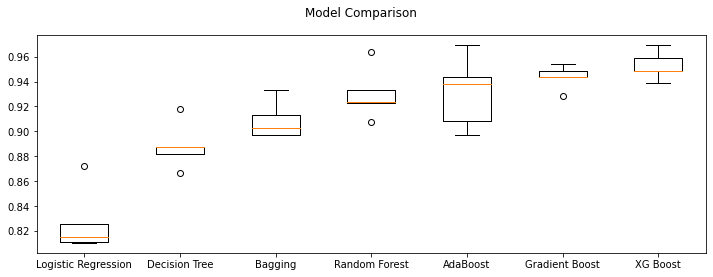

In [37]:
# plot boxplots for CV scores of all models defined above

fig = plt.figure(figsize=[12,4])

fig.suptitle("Model Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

#### Observations
- After undersampling -- Random Forest, AdaBoost, Gradient Boost and XG Boost show best cross-validation performance based on Recall score.
- Logistic Regression consistently shows poorest performance out of all models. 

### Selecting Top 3 Models

Of all cross-validation scores, the models built with oversampled data exhibit the best performance in terms of Recall. Therefore the top 3 models to be selected for hyperparameter tuning would be as follows: 

1. AdaBoost Oversampled 
2. Gradient Boost Oversampled
3. XG Boost Oversampled

## Hyperparameter Tuning

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [39]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### AdaBoost Oversampled Model Tuning

In [40]:
# perform hyperparameter tuning using Randomized Search

abc = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),
                      DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,50,100),
    "learning_rate":np.arange(0.1,1,0.1)
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
abc_rscv = RandomizedSearchCV(
    estimator=abc,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
abc_rscv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:".format(abc_rscv.best_params_, abc_rscv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3)} with CV score=0.9343031422578845:


In [41]:
abc_over_tuned = AdaBoostClassifier(random_state=1, 
                               n_estimators=10,
                               learning_rate=0.20,
                               base_estimator=DecisionTreeClassifier(max_depth=3)
)

# Fit the model on training data
abc_over_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.2, n_estimators=10, random_state=1)

In [42]:
# Calculating different metrics on train set
abc_over_tuned_model_train_perf = model_performance_classification_sklearn(abc_over_tuned, X_train_over, y_train_over)

print("Training Performance:")
abc_over_tuned_model_train_perf

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.933,0.946,0.922,0.934


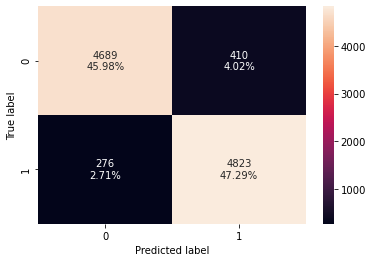

In [43]:
confusion_matrix_sklearn(abc_over_tuned, X_train_over, y_train_over)

In [44]:
# Calculating different metrics on train set
abc_over_tuned_model_val_perf = model_performance_classification_sklearn(abc_over_tuned, X_val, y_val)

print("Validation Performance:")
abc_over_tuned_model_val_perf

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.915,0.914,0.674,0.776


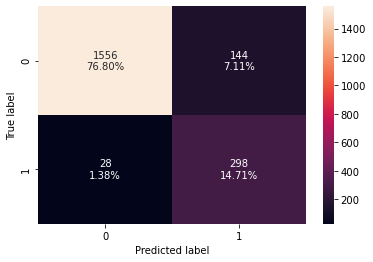

In [45]:
confusion_matrix_sklearn(abc_over_tuned, X_val, y_val)

In [46]:
# Calculating different metrics on testing set
abc_over_tuned_model_test_perf = model_performance_classification_sklearn(abc_over_tuned, X_test, y_test)

print("Testing Performance:")
abc_over_tuned_model_test_perf

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.918,0.932,0.678,0.785


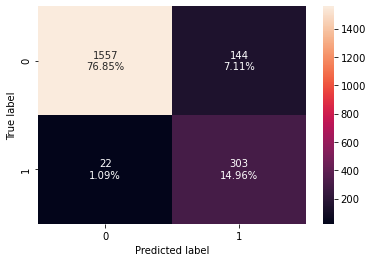

In [47]:
confusion_matrix_sklearn(abc_over_tuned, X_test, y_test)

### Gradient Boost Oversampled Model Tuning

In [48]:
# perform hyperparameter tuning using Randomized Search

gbc = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
gbc_rscv = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
gbc_rscv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:".format(gbc_rscv.best_params_, gbc_rscv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 100, 'max_features': 0.9} with CV score=0.9466616636841193:


In [49]:
gbc_over_tuned = GradientBoostingClassifier(random_state=1, 
                                       subsample=0.8,
                                       n_estimators=100,
                                       max_features=0.9
)

# Fit the model on training data
gbc_over_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features=0.9, random_state=1, subsample=0.8)

In [50]:
# Calculating different metrics on train set
gbc_over_tuned_model_train_perf = model_performance_classification_sklearn(gbc_over_tuned, X_train_over, y_train_over)

print("Training Performance:")
gbc_over_tuned_model_train_perf

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.967,0.970,0.964,0.967


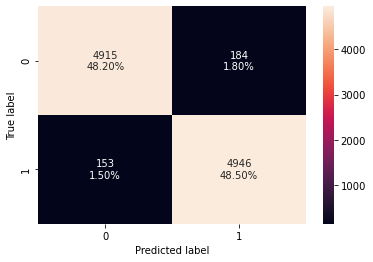

In [51]:
confusion_matrix_sklearn(gbc_over_tuned, X_train_over, y_train_over)

In [52]:
# Calculating different metrics on train set
gbc_over_tuned_model_val_perf = model_performance_classification_sklearn(gbc_over_tuned, X_val, y_val)

print("Validation Performance:")
gbc_over_tuned_model_val_perf

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.951,0.902,0.812,0.855


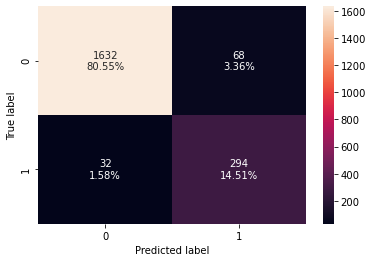

In [53]:
confusion_matrix_sklearn(gbc_over_tuned, X_val, y_val)

In [54]:
# Calculating different metrics on testing set
gbc_over_tuned_model_test_perf = model_performance_classification_sklearn(gbc_over_tuned, X_test, y_test)

print("Testing Performance:")
gbc_over_tuned_model_test_perf

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.951,0.945,0.791,0.861


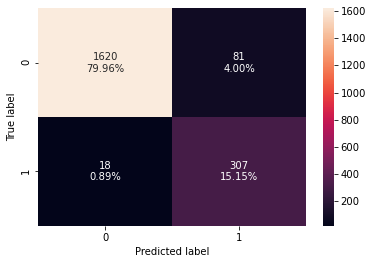

In [55]:
confusion_matrix_sklearn(gbc_over_tuned, X_test, y_test)

### XG Boost Oversampled Model Tuning

In [56]:
# perform hyperparameter tuning using Randomized Search

xgbc = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgbc_rscv = RandomizedSearchCV(
    estimator=xgbc,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
xgbc_rscv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(xgbc_rscv.best_params_, xgbc_rscv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 10, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9986274509803922:


In [57]:
xgbc_over_tuned = XGBClassifier(random_state=1,
                          subsample=0.8, 
                          scale_pos_weight=10,
                          reg_lambda=10,
                          n_estimators=50,
                          max_depth=2,
                          learning_rate=0.05,
                          gamma=1,
                          eval_metric='logloss'
)

# Fit the model on training data
xgbc_over_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
# Calculating different metrics on training set
xgbc_over_tuned_model_train_perf = model_performance_classification_sklearn(xgbc_over_tuned, X_train_over, y_train_over)

print("Training Performance:")
xgbc_over_tuned_model_train_perf

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.782,0.999,0.697,0.821


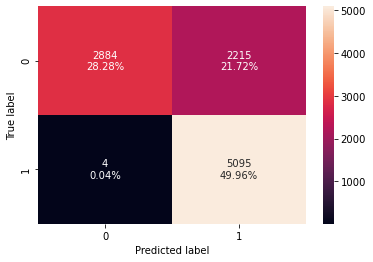

In [59]:
confusion_matrix_sklearn(xgbc_over_tuned, X_train_over, y_train_over)

In [60]:
# Calculating different metrics on validation set
xgbc_over_tuned_model_val_perf = model_performance_classification_sklearn(xgbc_over_tuned, X_val, y_val)

print("Validation Performance:")
xgbc_over_tuned_model_val_perf

Validation Performance:


,Accuracy,Recall,Precision,F1
0,0.644,0.997,0.311,0.474


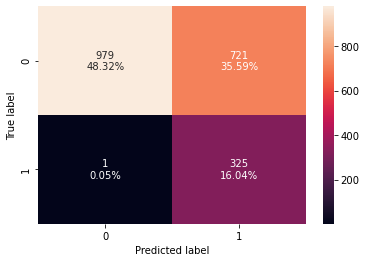

In [61]:
confusion_matrix_sklearn(xgbc_over_tuned, X_val, y_val)

In [62]:
# Calculating different metrics on testing set
xgbc_over_tuned_model_test_perf = model_performance_classification_sklearn(xgbc_over_tuned, X_test, y_test)

print("Testing Performance:")
xgbc_over_tuned_model_test_perf

Testing Performance:


,Accuracy,Recall,Precision,F1
0,0.627,1.000,0.301,0.463


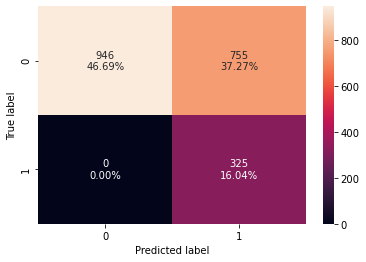

In [63]:
confusion_matrix_sklearn(xgbc_over_tuned, X_test, y_test)

In [64]:
# training performance comparison of all 3 models

models_train_comp_df = pd.concat(
    [abc_over_tuned_model_train_perf.T, 
     gbc_over_tuned_model_train_perf.T, 
     xgbc_over_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Adaboost Oversampled Model Tuned",
    "Gradient Boost Oversampled Model Tuned",
    "XGBoost Oversampled Model Tuned"]
print("Training Performance Comparison:")
models_train_comp_df

Training Performance Comparison:


,Adaboost Oversampled Model Tuned,Gradient Boost Oversampled Model Tuned,XGBoost Oversampled Model Tuned
Accuracy,0.933,0.967,0.782
Recall,0.946,0.970,0.999
Precision,0.922,0.964,0.697
F1,0.934,0.967,0.821


In [65]:
# validation performance comparison of all 3 models

models_val_comp_df = pd.concat(
    [abc_over_tuned_model_val_perf.T, 
     gbc_over_tuned_model_val_perf.T, 
     xgbc_over_tuned_model_val_perf.T],
    axis=1,
)
models_val_comp_df.columns = [
    "Adaboost Oversampled Model Tuned",
    "Gradient Boost Oversampled Model Tuned",
    "XGBoost Oversampled Model Tuned"]
print("Validation Performance Comparison:")
models_val_comp_df

Validation Performance Comparison:


,Adaboost Oversampled Model Tuned,Gradient Boost Oversampled Model Tuned,XGBoost Oversampled Model Tuned
Accuracy,0.915,0.951,0.644
Recall,0.914,0.902,0.997
Precision,0.674,0.812,0.311
F1,0.776,0.855,0.474


In [66]:
# testing performance comparison of all 3 models

models_test_comp_df = pd.concat(
    [abc_over_tuned_model_test_perf.T, 
     gbc_over_tuned_model_test_perf.T, 
     xgbc_over_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Adaboost Oversampled Model Tuned",
    "Gradient Boost Oversampled Model Tuned",
    "XGBoost Oversampled Model Tuned"]
print("Testing Performance Comparison:")
models_test_comp_df

Testing Performance Comparison:


,Adaboost Oversampled Model Tuned,Gradient Boost Oversampled Model Tuned,XGBoost Oversampled Model Tuned
Accuracy,0.918,0.951,0.627
Recall,0.932,0.945,1.000
Precision,0.678,0.791,0.301
F1,0.785,0.861,0.463


#### Observations
- Gradient Boost Oversampled Tuned Model exhibits the most robust performance in terms of Recall as well as all other metrics.
- XGBoost Oversampled Tuned Model is overfitting the test data and not able to produce reliable metrics. 

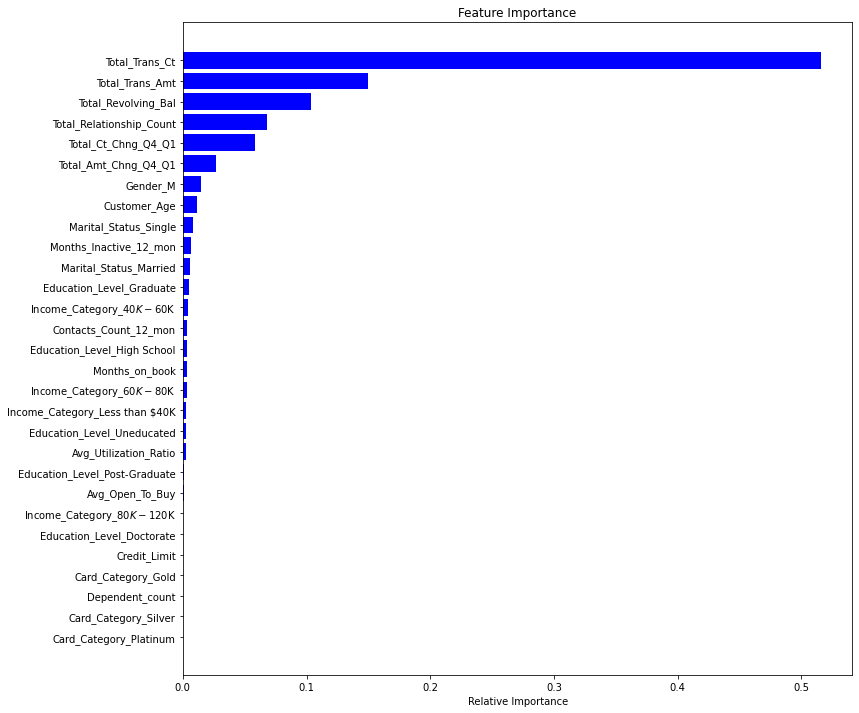

In [67]:
feature_names = X_train_over.columns
importances = gbc_over_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
- The top most important features are: Total Transaction Count, Total Transaction Amount, Total Revolving Balance and Total Relationship Count. 
- The least important features include: Card Category, Education Level, Income Category and Credit Limit.

### Final Model Selection
- Out of all 21 models, the Gradient Boost Oversampled Tuned Model exhibits the best performance.

## Productionize Final Model

In [68]:
# creating a list of numerical variables
numerical_features = [
                    'Customer_Age',
                    'Dependent_count',
                    'Months_on_book',
                    'Total_Relationship_Count',
                    'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon',
                    'Credit_Limit',
                    'Total_Revolving_Bal',
                    'Avg_Open_To_Buy',
                    'Total_Amt_Chng_Q4_Q1',
                    'Total_Trans_Amt',  
                    'Total_Trans_Ct',
                    'Total_Ct_Chng_Q4_Q1',
                    'Avg_Utilization_Ratio',
]

# creating a list of categorical variables
categorical_features = [
                    'Gender',
                    'Education_Level',
                    'Marital_Status',
                    'Income_Category',
                    'Card_Category',
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ]
)

# creating a transformer for categorical variables
# which will first apply simple imputer and then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ]
)

# handle_unknown = 'ignore', allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_transform', numerical_transformer, numerical_features),
        ('cat_transform', categorical_transformer, categorical_features),
    ],
    remainder='passthrough',
)
# remainder = 'passthrough' has been used, it will allow variables that are present in original data
# but not in 'numerical_columns' and 'categorical_columns' to pass through the column transformer without any changes

In [69]:
# Separating target variable and other variables
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [70]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [71]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('gbc_model', GradientBoostingClassifier(random_state=1, 
                                                 subsample=0.8,
                                                 n_estimators=100,
                                                 max_features=0.9
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
           

## Conclusion

### Insights
- The most important features include Total Transaction Count, Total Transaction Amount, Total Revolving Balance and Total Relationship Count. 
- Interestingly these features are negatively correlated with Attrition Flag.
- Low credit card usage/activity were the determining features in higher occurence of Attrition.
- The least important features include Card Category, Income Category and Education Level.

### Recommendations
- It is evident from the model that frequent credit card usage and higher activity would translate to lower attrition rates. Therefore Thera Bank should increase the promotion of enticing offers and schemes to drive customer interest, adoption and, most importantly, retention.

- Promotions can be in the form of signup bonuses, no/low interest schemes, balance transfers, card category upgrades, travel perks, and reward structures based on cash back, points or miles.

- Another way to drive credit card usage would be to routinely increase credit limits, which would encourage customers to make larger purchases and maintain higher balances.

- Looking at the bigger picture, Thera Bank should attempt to frequently connect with the customer on a more individual and personal level. Improving the customer journey will strengthen the relationship with the bank, thereby increasing retention.